## Confidence Interval Calculations

In this notebook, we'll see how to use Python to create confidence intervals.

**Big Idea:** Create an interval so that C\% of the time, the parameter of interest lands within that interval (C is the confidence level - typically 95\% or 99\%).

A confidence interval lets you quantify the uncertainty associated with a point estimate. Wider interval means more uncertainty.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Confidence Intervals for the Mean

In this example, you will be using data from the [American Time Use Survey](https://www.bls.gov/tus/). Specifically, you'll be looking at a sample of 50 adults and the number of minutes they reported sleeping for the survey day.

In [2]:
sleeping = pd.read_csv('../data/atus_sleeping.csv')

In [3]:
sleeping.head()

,participant_id,minutes_spent_sleeping,sex
0,20181211181182,270,Male
1,20180908180663,600,Male
2,20180706181412,355,Male
3,20181009181978,405,Male
4,20180503180964,270,Male


First, look at the distribution of the sample values.

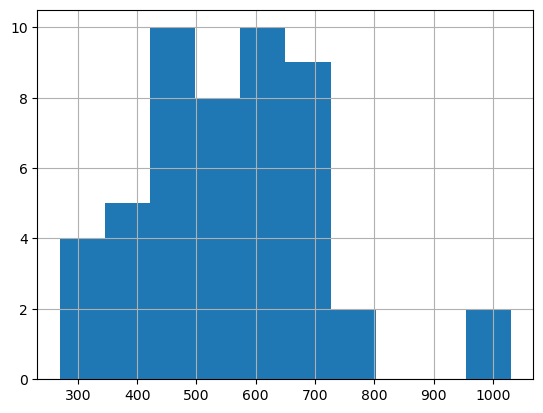

In [4]:
sleeping['minutes_spent_sleeping'].hist();

Let's build a 95% confidence interval for the mean time spent sleeping using the different methods.

**Method 1:** The percentile bootstrap.

Recall that to compute a bootstrap confidence interval, we simply need to generate a large number of resamples from the original sample and then look at the distribution of resample statistics.

In [5]:
num_sims = 10000

sample = sleeping['minutes_spent_sleeping']
resample_means = np.random.choice(sample, size=(num_sims, len(sample)), replace=True).mean(axis=1)
print((np.quantile(resample_means, q=0.025), np.quantile(resample_means, q=0.975)))

(np.float64(510.059), np.float64(593.4415))


**Method 2:** Analytical approach.

For this approach, we need to start by looking at the sample statistics. Recall that the formula for a 95% confidence interval is 

$$\bar{x} - t_{0.975} \cdot \frac{s}{\sqrt{n}} \leq \mu \leq \bar{x} + t_{0.975} \cdot \frac{s}{\sqrt{n}}$$

First, we need the sample mean.

In [6]:
x_bar = sleeping['minutes_spent_sleeping'].mean()
x_bar

np.float64(550.96)

Also, look to see how much variability there is in the sample by calculating the standard deviation:

In [7]:
s = sleeping['minutes_spent_sleeping'].std()
s

151.60070539925277

We also need the sample size.

In [8]:
n = sleeping['minutes_spent_sleeping'].count()
n

np.int64(50)

Now, we need to find the 97.5th percentile for the appropriate t-distribution. Recall that the t-distribution needs to have degrees of freedom equal to one less than the sample size.

We can do this by using the `t` function from the scipy stats module.

In [9]:
from scipy.stats import t

In [10]:
df = sleeping['minutes_spent_sleeping'].count() - 1
df

np.int64(49)

To find the percentile, we can use the ppf function. Note that ppf stands for percent point function, and is the inverse of the cumulative distribution function.

In [11]:
t_val = t.ppf(0.975, df=df)
t_val

np.float64(2.0095752371292397)

Now, we have all of the pieces that we need.

In [12]:
ci = (x_bar - t_val * s/np.sqrt(n), x_bar + t_val*s/np.sqrt(n))
ci

(np.float64(507.87555623459787), np.float64(594.0444437654022))

We can also the t.interval function if we don't want to have to do all of the calculations by hand.

In [13]:
from scipy.stats import sem

To use this function, you need to specify 4 things:
* confidence: The confidence level
* df: The number of degrees of freedom for the $t$-distribution, equal to the the sample size - 1
* loc: The sample mean
* scale: The standard error, equal to $\frac{s}{\sqrt{n}}$  

Let's first look at the standard error.

The **standard error** is an estimate of the variability in the sample means across all possible samples with the same size as our sample.

You can manually calculate it: 

In [14]:
sleeping['minutes_spent_sleeping'].std() / np.sqrt(len(sleeping['minutes_spent_sleeping']))

np.float64(21.439577364095136)

Or we can use the `sem` function:

In [15]:
sem(sleeping['minutes_spent_sleeping'])

np.float64(21.439577364095133)

Passing all of these values into the `t.interval` function, you can get a 95% confidence interval as follows:

In [16]:
t.interval(
    confidence = 0.95, 
    df = n - 1, 
    loc = x_bar, 
    scale = sem(sleeping['minutes_spent_sleeping'])
          )

(np.float64(507.87555623459787), np.float64(594.0444437654022))

You can be 95% confident that the population mean is between 507 minutes and 594 minutes.

The **margin of error** for a confidence interval is the distance from the point estimate (here, the sample mean) to the end of the interval.

In this case, what is the margin of error?  

Recall from above that the point estimate was 550.96.

In [17]:
550.96 - 507.88 

43.08000000000004

In [18]:
594.04 - 550.96

43.07999999999993

Notice that, due to the symmetry of the confidence interval, you get the same margin of error for either difference.

What happens if we change our confidence level? Create a new confidence interval, but this time do an 80\% confidence interval.

In [19]:
#Your code here

How does the margin of error change from the margin of error for the 95\% confidence interval?

In [20]:
# Your code here

You can see that the margin or error is smaller. However, you are less confident that the true population mean is in this interval.

Now, create a 99\% confidence interval.

In [21]:
# Your code here

The margin of error now is much larger:

In [22]:
# Your code here

This demonstrates the key tradeoff when building confidence intervals. If you want to be more confident that the confidence interval contains the true population parameter, you need to increase the margin of error.

## Confidence Intervals for the Proportion

For this example, you'll be working wit a sample of 250 participants in the 2015 [National Health and Nutrition Examination Survey](https://www.cdc.gov/nchs/nhanes/index.htm) who were at least 18 years old.

Specifically, using this sample, estimate the proportion of US adults who smoke. In this dataset, there is a column indicating whether the person smoked tobacco in the last five days, so you can use this to make your estimate.

In [23]:
smoking = pd.read_csv('../data/NHANES_smoking.csv')
smoking.head()

,SEQN,age,smoked_in_last_5_days
0,89458.0,70.0,False
1,93352.0,40.0,False
2,92045.0,40.0,False
3,86461.0,31.0,False
4,84212.0,67.0,False


First, let's take a look at the data and see how it is divided between the two categories:

In [24]:
smoking['smoked_in_last_5_days'].value_counts()

smoked_in_last_5_days
False    196
True      54
Name: count, dtype: int64

In [25]:
smoking['smoked_in_last_5_days'].value_counts(normalize = True)

smoked_in_last_5_days
False    0.784
True     0.216
Name: proportion, dtype: float64

Based on the sample, the point estimate for the proportion of adults who smoked in the last 5 days is 21.6%.

Now, create our confidence interval.

**Method 1: The Percentile Bootstrap**

We can again create a confidence interval by taking a large number of resamples and then looking at the distribution of sample proportions.

In [26]:
sample = smoking['smoked_in_last_5_days']

In this case notice that the values are already True/False, so we can use the trick with .mean to find the proportion of trues per resample.

In [27]:
np.random.choice(sample, size=len(sample), replace=True).mean()

np.float64(0.168)

Now, let's scale up to a large number of resamples. 

In [28]:
num_resamples = 10000

resample_proportions = np.random.choice(sample, size=(num_resamples, len(sample)), replace=True).mean(axis=1)
print((np.quantile(resample_proportions, q=0.025), np.quantile(resample_proportions, q=0.975)))

(np.float64(0.168), np.float64(0.268))


**Method 2: Analytical**  
Confidence intervals for the proportion can be constructed using the `proportion_confint` function from the `statsmodels.stats.proportion` module.

The analytical approach uses the fact that the sample proportion follows a binomial distribution and that this binomial distribution can be approximated by a normal distribution.

In [29]:
from statsmodels.stats.proportion import proportion_confint

To use this function, you need to specify
* count: The number of "successes"
* nobs: the total number of observations
* alpha: 1 - confidence level

If you want to get the count of people who did smoke in the last 5 days, you can use `.loc`

In [30]:
smoking['smoked_in_last_5_days'].value_counts().loc[True]

np.int64(54)

In [31]:
proportion_confint( 
    count = smoking['smoked_in_last_5_days'].value_counts().loc[True],
    nobs = smoking['smoked_in_last_5_days'].count(),
    alpha = 0.05
)

(0.16498909910493145, 0.2670109008950685)

This shows that we can be 95% confident that the true proportion of US adults who regularly smoke tobacco is between 16.5% and 26.7%.

## Further Applications of the Bootstrap

One major advantage of the bootstrap is that it can be used in cases where deriving an analytical solution can be more challenging. We simply need to create resamples and then look at the distribution of the sample statistics.

**Example: Difference in Means**

Our sleeping dataset above contains 25 male and 25 female participants. Suppose we wanted to see if our data provides evidence that there is a difference in the average amount of time spent sleeping between males and females.

We can start by looking at the observed difference.

In [32]:
sleeping.groupby('sex')['minutes_spent_sleeping'].mean()

sex
Female    582.32
Male      519.60
Name: minutes_spent_sleeping, dtype: float64

Is this difference just to to random sampling or is it too great to be explained just due to random chance?

Our approach here will be to take resamples from the male group, resamples from the female group, and then take the difference in resample means.

In [33]:
sleeping_female = sleeping.loc[sleeping['sex'] == 'Female', 'minutes_spent_sleeping']
sleeping_male = sleeping.loc[sleeping['sex'] == 'Male', 'minutes_spent_sleeping']

In [34]:
num_resamples = 10000
resample_means_female = np.random.choice(sleeping_female, size=(num_resamples, len(sleeping_female)), replace=True).mean(axis=1)
resample_means_male = np.random.choice(sleeping_male, size=(num_resamples, len(sleeping_male)), replace=True).mean(axis=1)

resample_means_diff = resample_means_female - resample_means_male

Let's look at the distribution of differences.

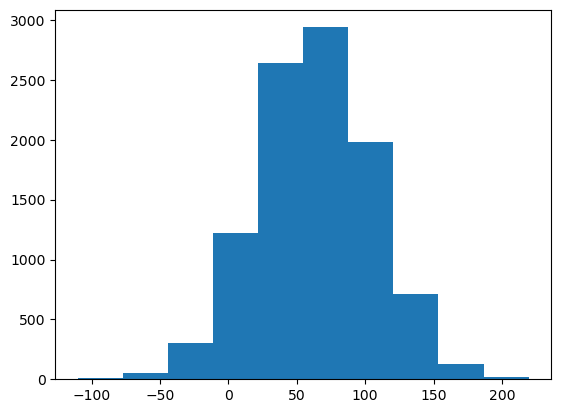

In [35]:
plt.hist(resample_means_diff);

And then look at our confidence interval.

In [36]:
print((np.quantile(resample_means_diff, q=0.025), np.quantile(resample_means_diff, q=0.975)))

(np.float64(-18.801999999999953), np.float64(144.8029999999999))


Based on this confidence interval, we can't be confident that the true difference is equal to 0. Our data doesn't provide enough evidence to conclude that there is an actual difference in minutes spent sleeping between males and females.

**Example: Correlation**

For this example, let's revisit our nba dataset.

In [37]:
nba = pd.read_csv("../data/nba_players.csv")

Let's look at the correlation between our numeric variables.

In [38]:
nba.corr(numeric_only=True)

,height_inches,weight_lbs,pts_per_game,rebounds_per_game,assists_per_game,salary
height_inches,1.000000,0.724698,-0.052924,0.482529,-0.328637,0.030506
weight_lbs,0.724698,1.000000,0.000556,0.473268,-0.241087,0.086584
pts_per_game,-0.052924,0.000556,1.000000,0.581588,0.708792,0.748877
rebounds_per_game,0.482529,0.473268,0.581588,1.000000,0.338455,0.496373
assists_per_game,-0.328637,-0.241087,0.708792,0.338455,1.000000,0.563261
salary,0.030506,0.086584,0.748877,0.496373,0.563261,1.000000


There appers to be a slight positive correlation between height and salary. Does this hold up if we build a confidence interval?

In this case, since we are looking at pairs of points, we need to be resampling rows rather than individual values. Fortunately, pandas does let us resample our DataFrame.

In [39]:
var_1 = 'height_inches'
var_2 = 'salary'

nba.sample(n=len(nba), replace=True).corr(numeric_only=True).loc[var_1, var_2]

np.float64(-0.023294069119511485)

The trick is that we need to repeat this process a large number of times and store the values. To do this, we can make use of a for loop, a tool when you want to do the same process over and over.

In [40]:
num_resamples = 10000
resample_correlations = []

var_1 = 'height_inches'
var_2 = 'salary'

for _ in range(num_resamples):
    resample_correlations.append(nba.sample(n=len(nba), replace=True).corr(numeric_only=True).loc[var_1, var_2])

print((np.quantile(resample_correlations, q=0.025), np.quantile(resample_correlations, q=0.975)))

(np.float64(-0.06997480957569675), np.float64(0.1304794300045217))


We can repeat this but look at another pair of variables, say height_inches and weight_lbs.

In [41]:
num_resamples = 10000
resample_correlations = []

var_1 = 'height_inches'
var_2 = 'weight_lbs'

for _ in range(num_resamples):
    resample_correlations.append(nba.sample(n=len(nba), replace=True).corr(numeric_only=True).loc[var_1, var_2])

print((np.quantile(resample_correlations, q=0.025), np.quantile(resample_correlations, q=0.975)))

(np.float64(0.6754284202995955), np.float64(0.7702629731800571))


In this case, our confidence is well away from zero, so we can say that the data provides evidence of a positive correlation between height and weight (not surprisingly).